In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Model
from keras.layers import Input
from keras.layers import Embedding
from keras.layers.merge import add
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import to_categorical


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
group_data=pd.read_csv('data_showerPlane.csv')
df=pd.read_csv('data_showerPlane.csv')

In [ ]:
df1 = df_result[['True Value','Predicted Value']]
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

KeyboardInterrupt: 

In [5]:
df_result.head()

,Unnamed: 0,Normalized True Value,Normalized Predicted Value,True Value,Predicted Value
0,0,0.490318,0.359742,0.490318,0.359742
1,1,0.375776,0.357076,0.375776,0.357076
2,2,0.502939,0.428854,0.502939,0.428854
3,3,0.417354,0.403185,0.417354,0.403185
4,4,0.353029,0.456984,0.353029,0.456984


In [9]:
x = df_result['Normalized True Value']
x

0       0.490318
1       0.375776
2       0.502939
3       0.417354
4       0.353029
          ...   
1483    0.473326
1484    0.406389
1485    0.418597
1486    0.357214
1487    0.390292
Name: Normalized True Value, Length: 1488, dtype: float64

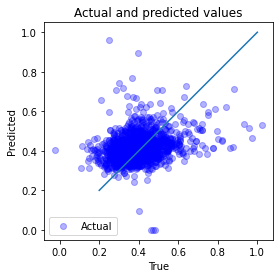

In [14]:
_, ax = plt.subplots()

ax.scatter(x = df_result['True Value'].to_list(), y=df_result['Predicted Value'].to_list(), c = 'blue', label = 'Actual', alpha = 0.3)
#ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

x=[0.2,0.4,0.6,0.8,1.0]
y=[0.2,0.4,0.6,0.8,1.0]
plt.plot(x,y)
plt.gca().set_aspect('equal')
plt.title('Actual and predicted values')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.legend()
plt.savefig("actual_vs_predicted.png")
plt.show()


In [ ]:
diff = df_result['True Value'] - df_result['Predicted Value']
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('MPG prediction error')
plt.ylabel('Frequency')
plt.savefig('prediction_histogram.png')

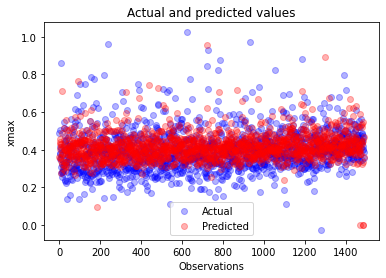

In [67]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('xmax')
plt.legend()
plt.savefig("xmax_vs_observation.png")
plt.show()


In [ ]:
# partial caption sequence model
inputs2 = Input(shape=(X_train2.shape[1],))
se1 = Embedding(X_train2.shape[0], 256, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

# decoder (feed forward) model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)